# **Win-3.11-ScreenSaver**

# **Description**

In this lab, I will recreate the Windows 3.11 screen saver using Python and the pygame library.

# **Goals of work**

During the work I will:

1. Set up the environment for correct operation.
2. Implement all the necessary functions so that the algorithm works at a basic level.
3. Add some “unique feature” of our choice, which will highlight my work among others and show that I really understand the principle of work.
4. Prepare the README.md file as a laboratory report and get a good grade.



# **Work process**

1. *Since we use PyCharm, the virtual environment is configured automatically*.
2. *Then we install all the necessary libraries from requirements.txt*.


  `pip install -r requirements.txt`

3. *Let's create the base game cycle*. For our animation to work, it must be created inside a special "game loop". Now we will try to create such a loop to check that all libraries are installed correctly and you can start working on the laboratory work.



In [ ]:
import pygame

# How many pixels will the screeen with your animation have.
# Try different sizes to check how they work
screen_width = screen_hight = 800

pygame.init() # Initialize the game screen
screen = pygame.display.set_mode((screen_width, screen_hight))
done = None # This variable will track if the "game" is done or not

#The game cycle
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    pygame.display.flip()

pygame.quit()

4. *We've seen a black screen, everything is fine than! We can move forward and try to complete the task.*

  Before we move on to writing the functions of the main program loop, we need to decide on the data structures and representation of our objects, since they must be created before the game loop begins.

In [ ]:
'''↓↓↓ YOUR CODE HERE ↓↓↓'''
number_of_stars = 100 # It should be integer.
speed = 0.09 # It should be a float number.
# Each star consists of an X-coordinate, a Y-coordinate, a Z-distance (distance to the star), and a color.
# This should be a list because it's easier to work with.
stars = []
'''↑↑↑ YOUR CODE HERE ↑↑↑'''

5. *Now let's write a function to create a star*. As we stated earlier, each star consists of an X-coordinate, a Y-coordinate, a Z-distance (distance to the star), and a color.

  We will use the random module so that the new star is generated at random coordinates within some starting “field”. The Z distance will always be equal to 256 (the maximum distance of the star from us). The initial color is 0, so that the brightness of the star increases as it approaches us.

  When writing a function, we need to know that the center of coordinates in pygame is in the top left corner of the window, so be sure to take this fact into account when creating the star. For convenience, our “reduced” coordinate center will be placed at the center of the screen, that is, the coordinates should have coordinates in the intervals:

  `  (- screen width // 2 : + screen width // 2, - screen height // 2, + screen height // 2)`

In [ ]:
def new_star():
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = random.randint(0, screen_width) - screen_width // 2
    y = random.randint(0, screen_hight) - screen_hight // 2
    z = 256
    color = 0
    star = [x, y, z, color]
    '''↑↑↑ YOUR CODE HERE ↑↑↑'''

    return star

6. Let's generate some starts and see whether they are OK or not

In [ ]:
# Tests. Run for check the function

for i in range(100):
    star_sample = new_star()
    assert len(star_sample) == 4, 'The star is defined by 4 numbers'
    assert -(screen_width // 2) <= star_sample[0] <= screen_width // 2, 'coordinates should have coordinates in the intervals (- screen width: + screen width, - screen height, + screen height)'
    assert -(screen_hight // 2) <= star_sample[1] <= screen_hight // 2 , 'coordinates should have coordinates in the intervals (- screen width: + screen width, - screen height, + screen height)'
    assert star_sample[2] == 256, 'Z coordinate has to be equal 256'
    assert star_sample[3] == 0, 'Start color has to be equal to 0'
print('Seems fine, good job!')

7. Now let's implement the movement and verification mechanism. We need to calculate its x and y coordinates for each star at each step in accordance with the perspective (z coordinate). We can do this as discussed in lecture using the following formulas:

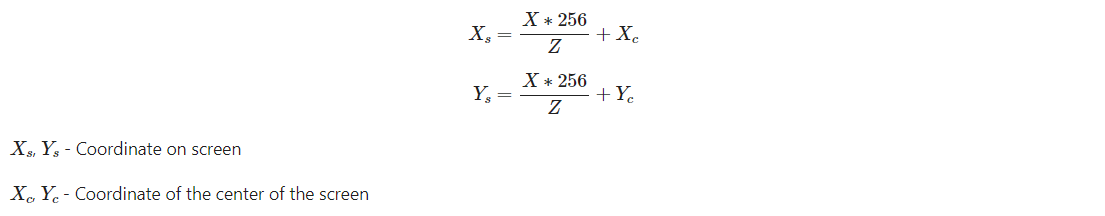

8. Then we have to check if the star has gone off the screen. If this happens, we will remove this star from our list and generate a new star instead.

In [ ]:
def move_and_check(star: list):
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = (star[0] * 256) / star[2]
    y = (star[1] * 256) / star[2]

    star[2] -= speed  # Change Z coordinate

    # If the coordinates go beyond the screen, we generate a new star.
    if star[2] <= 0 or x <= -screen_width // 2 or x >= screen_width // 2 or y <= -screen_hight // 2 or y >= screen_hight // 2:
        star = new_star()

    # If the color has not reached maximum brightness, increase the color.
    if star[3] < 256:
        star[3] += 0.15

    # If suddenly the color becomes more than acceptable, then set it to 255.
    if star[3] >= 256:
        star[3] = 255

    '''↑↑↑ YOUR CODE HERE ↑↑↑'''
    return star

9. To check that everything works as expected, I simulate a test run. If we don't get any errors during the run, then your code is written correctly (very likely)

In [ ]:
stars = [new_star() for _ in range(50)]
for i in range(1000):
    for star in stars:
        move_and_check(star)
print('Seems good!')

10. We are very close to implementing the basic algorithm. Now all that is needed is to build a loop within which our functions will be called and draw the stars on the screen. Let's implement a draw_star function that will display a star on the screen. The main thing is not to forget to make the reverse transition from our selected coordinate system to the window coordinate system.

In [ ]:
def draw_star(star: list):
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = (star[0] * 256) / star[2] + screen_width // 2
    y = (star[1] * 256) / star[2] + screen_hight // 2
    '''↑↑↑ YOUR CODE HERE ↑↑↑'''
    pygame.draw.circle(screen, (star[3], star[3], star[3]), (x, y), 3)

11. Let's check how our code works using a working example.

In [ ]:
import pygame
import random

'''↓↓↓ YOUR CODE HERE ↓↓↓'''
screen_width = screen_hight = 800
'''↑↑↑ YOUR CODE HERE ↑↑↑'''

pygame.init()
screen = pygame.display.set_mode((screen_width, screen_hight))
done = False

'''↓↓↓ YOUR CODE HERE ↓↓↓'''
number_of_stars = 100
speed = 0.09
stars = []
'''↑↑↑ YOUR CODE HERE ↑↑↑'''


def new_star():
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = random.randint(0, screen_width) - screen_width // 2
    y = random.randint(0, screen_hight) - screen_hight // 2
    z = 256
    color = 0
    star = [x, y, z, color]
    '''↑↑↑ YOUR CODE HERE ↑↑↑'''

    return star


def move_and_check(star: list):
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = (star[0] * 256) / star[2]
    y = (star[1] * 256) / star[2]

    star[2] -= speed  # Change Z coordinate

    # If the coordinates go beyond the screen, we generate a new star.
    if star[2] <= 0 or x <= -screen_width // 2 or x >= screen_width // 2 or y <= -screen_hight // 2 or y >= screen_hight // 2:
        star = new_star()

    # If the color has not reached maximum brightness, increase the color.
    if star[3] < 256:
        star[3] += 0.15

    # If suddenly the color becomes more than acceptable, then set it to 255.
    if star[3] >= 256:
        star[3] = 255

    '''↑↑↑ YOUR CODE HERE ↑↑↑'''
    return star


def draw_star(star: list):
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = (star[0] * 256) / star[2] + screen_width // 2
    y = (star[1] * 256) / star[2] + screen_hight // 2
    '''↑↑↑ YOUR CODE HERE ↑↑↑'''
    pygame.draw.circle(screen, (star[3], star[3], star[3]), (x, y), 3)


for i in range(0, number_of_stars):
    stars.append(new_star())

while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    screen.fill((0, 0, 0))

    for i in range(0, number_of_stars):
        s = stars[i]

        '''↓↓↓ YOUR CODE HERE ↓↓↓'''
        # Move the star and check if it still appear
        s = move_and_check(s)
        '''↑↑↑ YOUR CODE HERE ↑↑↑'''

        stars[i] = s

        '''↓↓↓ YOUR CODE HERE ↓↓↓'''
        # draw the star on the screen
        draw_star(s)
        '''↑↑↑ YOUR CODE HERE ↑↑↑'''

    pygame.display.flip()

pygame.quit()

12. Finally! We made it!

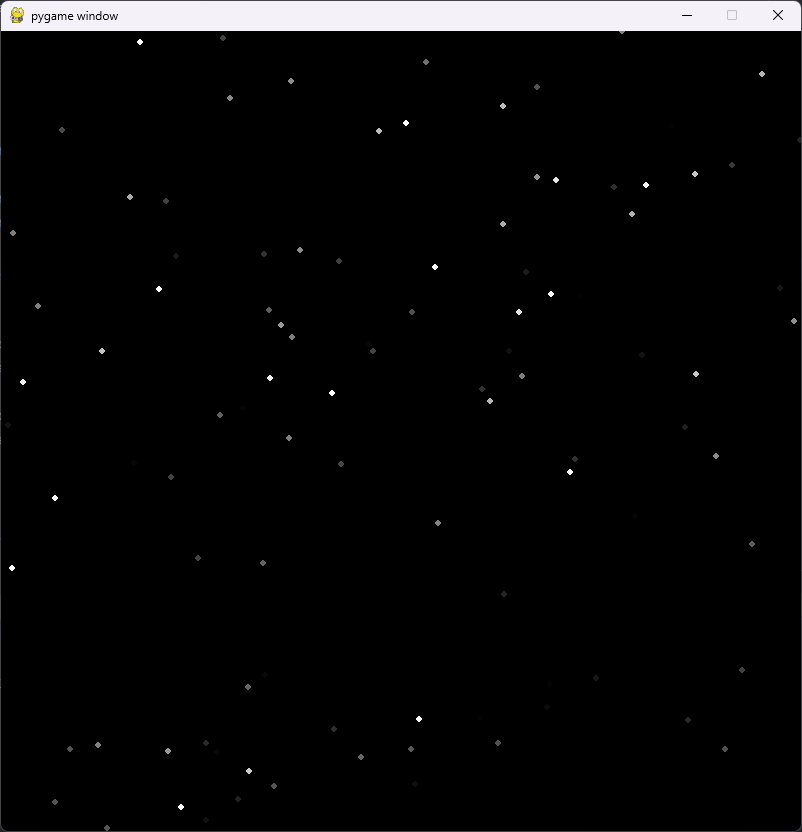

# **Unique feature**

Now let's change our functions to make our code unique. The goal is to make the stars change color from red to blue.

In [ ]:
def move_and_check(star: list):
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = (star[0] * 256) / star[2]
    y = (star[1] * 256) / star[2]

    star[2] -= speed  # Change Z coordinate

    # If the coordinates go beyond the screen, we generate a new star.
    if star[2] <= 0 or x <= -screen_width // 2 or x >= screen_width // 2 or y <= -screen_hight // 2 or y >= screen_hight // 2:
        star = new_star()

    # If the color has not reached maximum brightness, increase the color.
    if star[3] < 150:
        star[3] += 0.15

    # If suddenly the color becomes more than acceptable, then set it to 255.
    if star[3] >= 150:
        star[3] = 255

    '''↑↑↑ YOUR CODE HERE ↑↑↑'''
    return star

In [ ]:
def draw_star(star: list):
    '''↓↓↓ YOUR CODE HERE ↓↓↓'''
    x = (star[0] * 256) / star[2] + screen_width // 2
    y = (star[1] * 256) / star[2] + screen_hight // 2
    '''↑↑↑ YOUR CODE HERE ↑↑↑'''
    pygame.draw.circle(screen, (150, star[3], star[3]), (x, y), 3)

Let's check the result!

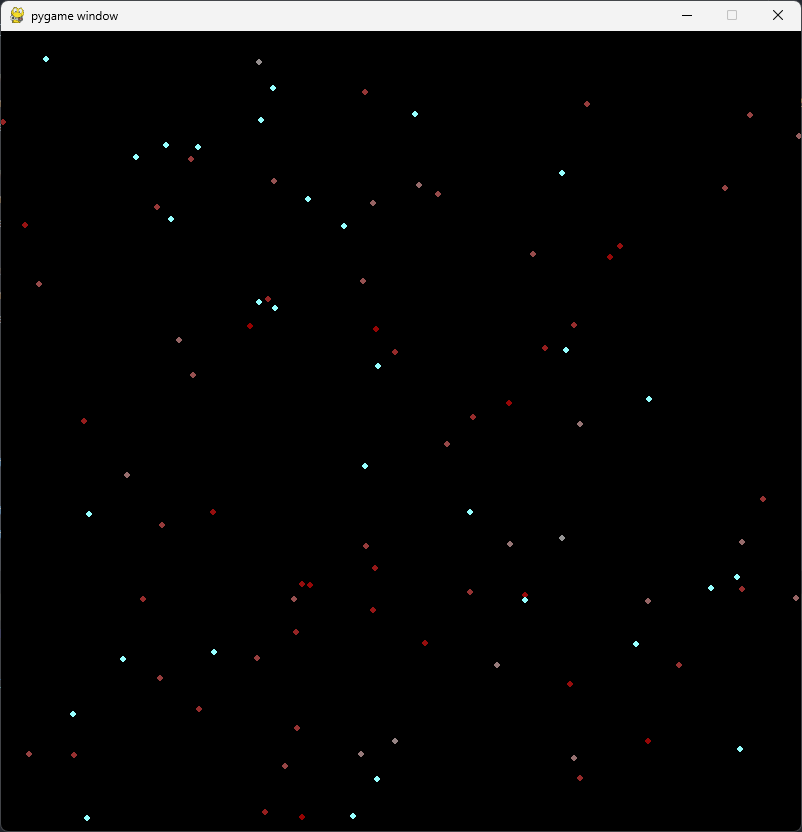

# **Conclusion**

In this lab, I recreated the Windows 3.11 screen saver using Python and the pygame library. I made a unique feature and improved my Python programming skills.